In [1]:
%run Function_set_gurobi.ipynb
import networkx as nx
import numpy as np
from collections import defaultdict
import random
from numpy import random
import matplotlib.pyplot as plt

In [3]:
from collections import defaultdict

import numpy as np
import gurobipy as gp
from gurobipy import GRB
from gurobipy import*
from gurobipy import quicksum

In [4]:
network,pos = Make_Question(3,4,Density = 0.7, option = "1-norm", distance = 2)

print(network)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0.]]


{(1, 0): '0', (2, 0): '1', (3, 0): '2', (4, 0): '3', (5, 0): '4', (6, 0): '5', (7, 0): '6', (8, 0): '7', (1, 2): '8', (2, 3): '10', (2, 4): '11', (4, 5): '14', (5, 6): '16', (5, 8): '17', (7, 8): '19', (2, 1): '9', (3, 2): '12', (4, 2): '13', (5, 4): '15', (6, 5): '18', (8, 5): '20', (8, 7): '21'}


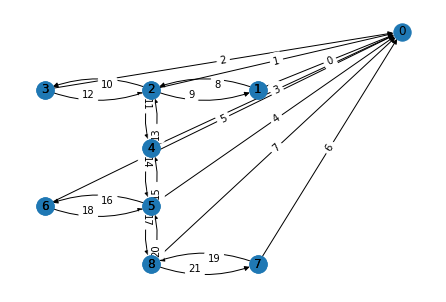

In [6]:
G, compelete_label, graph = complete_Graph(network,pos)
print(compelete_label)

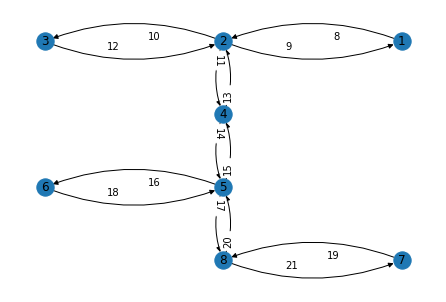

In [5]:
G_prime, sub_edge_label, sub_graph = sub_Graph (network,pos)

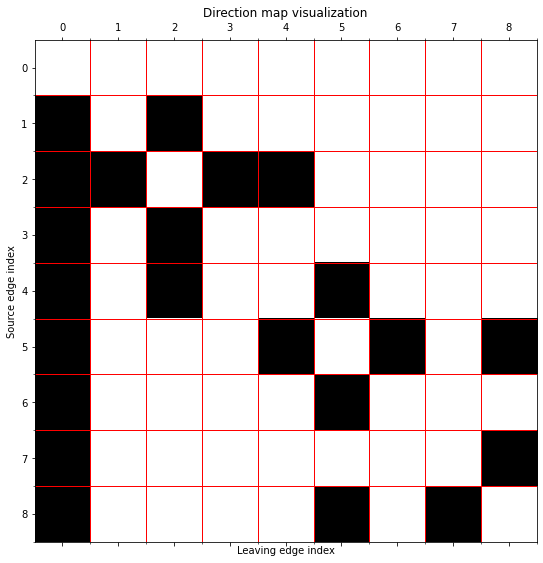

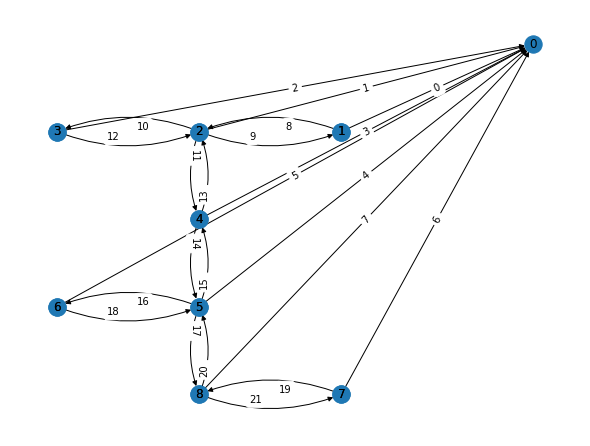

In [7]:
#matfig = plt.figure(figsize=(Final_map.shape[0],Final_map.shape[1]))
matfig = plt.figure(figsize=(9,9))
plt.matshow(network,cmap=plt.cm.binary,fignum=matfig.number)
ax = plt.gca()
#plt.matshow(Final_map,cmap=plt.cm.binary)
plt.xlabel('Leaving edge index')
plt.ylabel('Source edge index')
plt.title ("Direction map visualization")

# Major ticks
ax.set_xticks(np.arange(0, network.shape[0], step=1))
ax.set_yticks(np.arange(0, network.shape[0], step=1))

# Labels for major ticks
ax.set_xticklabels(np.arange(0, network.shape[0], step=1))
ax.set_yticklabels(np.arange(0, network.shape[0], step=1))

# Minor ticks
ax.set_xticks(np.arange(0.5, network.shape[0]+0.5, step=1), minor=True)
ax.set_yticks(np.arange(0.5, network.shape[0]+0.5, step=1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='r', linestyle='-', linewidth=1)

plt.show()


plt.figure(2,figsize=(8,6)) 
_, _, _ = complete_Graph(network,pos)

In [8]:
%run Function_set_gurobi.ipynb
# How many panel ---> Max electricity level wire could reach 
Q = len(pos)-1

N_tree = capacity_subtree_limit_generator(pos,Q)

1 4


In [9]:
%run Function_set_gurobi.ipynb

print(Q)

# How many edges
edge_number = len(compelete_label)


# basic_cost shape => (1,number_of_edge)
# such as : basic_cost = np.vstack(np.ones(number_of_edge))
# test case : #basic_cost = np.arange(edge_number)

basic_cost = np.ones(edge_number) * 2


# flow cost (p)
flow_cost = np.ones(edge_number) 
p = 1


# make dictionary
edge_dictionary, Total = make_dictionary(edge_number, Q, N_tree)

# initialize a QUBO matrix needed
QUBO_matrix_initial = np.zeros((Total, Total))


print('N_tree  = ', N_tree )
#print('edge_dictionary  = ', edge_dictionary )

8
N_tree  =  [2 3 4]


In [10]:
c_e = (np.tile(np.vstack(basic_cost),(1,Q+1)))
        
level_coeff = (np.tile(np.arange(1,Q + 1),(edge_number,1))).flatten()

In [11]:
def constraint_1(Final_map, Q, edge_dictionary, compelete_label, vertex):
    
    index = np.hstack(np.asarray(np.where(Final_map[vertex,:])))             
            
    index_matched = []
    
    for vertex_selected in index:
            
        #print(int(compelete_label[(vertex, vertex_selected)]))
        
            index_matched.append( int(compelete_label[(vertex, vertex_selected)]) )
    
    return index_matched


In [12]:
def constraint_2(Final_map, Q, edge_dictionary, compelete_label, vertex):
    
    index_out = np.hstack(np.asarray(np.where(Final_map[vertex,:])))             
            
    index_out_matched = []
    
    for vertex_selected in index_out:
            
        index_out_matched.append( int(compelete_label[(vertex, vertex_selected)])  )
    
    index_in = np.hstack(np.asarray(np.where(Final_map[:,vertex])))
    
    index_in_matched = []
    
    for vertex_selected in index_in:
        index_in_matched.append( int(compelete_label[(vertex_selected, vertex )])  )

    
    return index_out_matched, index_in_matched

In [39]:
def capacity_subtree_limit_generator(Q):
    # the max and min number of subtrees with a capacity equal to t in T 
    # option 1 (disagrd)
    #m_t_u = np.round(0.55 * Q * np.ones(Q))
    #m_t_l = np.round(0.25 * Q * np.ones(Q))
    
    
    #应该作为 Input 
    m_t_u = np.zeros(int(Q))
    m_t_l = np.zeros(int(Q))
    
    for i in range(Q):
        m_t_l[i], m_t_u[i] = np.sort(np.random.choice(int(Q), 2, replace=False))
    
    m_t_u_update = np.where(m_t_u>=Q, Q,  m_t_u)
    #m_t_l_update = np.where(m_t_l<=0, 0,  m_t_l)
    m_t_l_update = np.zeros(int(Q))
    
    return m_t_u_update,m_t_l_update

In [40]:
try:

    # Create a new model
    m = gp.Model("Solar_panel_new_model")

    # Create variables
    x = m.addVars(edge_number, Q, vtype=GRB.BINARY, name="x")
    
    print(x[0,1])
    # Set objective
    m.setObjective(quicksum(quicksum((p*j+1) * c_e[i,j]  * x[i,j] for i in range(edge_number)) 
                            for j in range(Q)), GRB.MAXIMIZE)

    # Add constraint 1:
    for vertex in range(1, Q + 1):
    
        index = constraint_1(network, Q, edge_dictionary, compelete_label, vertex)

        # 
        m.addConstr(quicksum( quicksum(x[i,j] for j in range(Q)) for i in index) == 1, name=f'constraint_1_vertex_{vertex}')

    # Add constraint 2:  
    for vertex in range(1, Q + 1):
    
        index_out, index_in = constraint_2(network, Q, edge_dictionary, compelete_label, vertex)
    
        #print(index_out, index_in, level_coeff[index_in])
    
        m.addConstr( quicksum(quicksum( (j+1) * x[i,j] for j in range(Q)) for i in index_out) - quicksum( quicksum( (n+1) * x[m,n] for n in range(Q)) for m in index_in)  == 1, name=f'constraint_2_vertex_{vertex}')

    # Add constraint 3:
    m_t_u,m_t_l = capacity_subtree_limit_generator(Q)
    print(m_t_u,m_t_l)
    
    for level in range(Q):
        m.addConstr ( quicksum(x[i,int(level)] for i in range(Q)) >= m_t_l[int(level)], name=f'constraint_3_Buslowerlevel_{level}')
        m.addConstr ( quicksum(x[i,int(level)] for i in range(Q)) <= m_t_u[int(level)], name=f'constraint_3_Busupperlevel_{level}')
    
    
    # Optimize model
    m.optimize()
    print (m.display())

    #$for v in m.getVars():
        #print('%s %g' % (v.varName, v.x))

    x_list = [str.replace(str.replace(v.varName,"]",""),"x[","") for v in m.getVars() if v.x == 1 and v.varName[0] =='x']
        
    print(x_list )
    
    #print('Obj: %g' % m.objVal)

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')

<gurobi.Var *Awaiting Model Update*>
[4. 7. 3. 4. 7. 4. 3. 3.] [0. 0. 0. 0. 0. 0. 0. 0.]
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 12 physical cores, 24 logical processors, using up to 24 threads
Optimize a model with 32 rows, 176 columns and 592 nonzeros
Model fingerprint: 0x437c9362
Variable types: 0 continuous, 176 integer (176 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [2e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+00]
Presolve removed 16 rows and 81 columns
Presolve time: 0.00s
Presolved: 16 rows, 95 columns, 259 nonzeros
Variable types: 0 continuous, 95 integer (95 binary)
Found heuristic solution: objective 38.0000000
Found heuristic solution: objective 58.0000000

Root relaxation: objective 6.219048e+01, 25 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd  

x[14,2] + -4.0 x[14,3] + -5.0 x[14,4] + -6.0 x[14,5] + -7.0 x[14,6] + -8.0 x[14,7] +
x[15,0] + 2.0 x[15,1] + 3.0 x[15,2] + 4.0 x[15,3] + 5.0 x[15,4] + 6.0 x[15,5] + 7.0
x[15,6] + 8.0 x[15,7] + x[16,0] + 2.0 x[16,1] + 3.0 x[16,2] + 4.0 x[16,3] + 5.0 x[16,4]
+ 6.0 x[16,5] + 7.0 x[16,6] + 8.0 x[16,7] + x[17,0] + 2.0 x[17,1] + 3.0 x[17,2] + 4.0
x[17,3] + 5.0 x[17,4] + 6.0 x[17,5] + 7.0 x[17,6] + 8.0 x[17,7] + -1.0 x[18,0] + -2.0
x[18,1] + -3.0 x[18,2] + -4.0 x[18,3] + -5.0 x[18,4] + -6.0 x[18,5] + -7.0 x[18,6] +
-8.0 x[18,7] + -1.0 x[20,0] + -2.0 x[20,1] + -3.0 x[20,2] + -4.0 x[20,3] + -5.0 x[20,4]
 + -6.0 x[20,5] + -7.0 x[20,6] + -8.0 x[20,7]> = 1
constraint_2_vertex_6: <gurobi.LinExpr: x[5,0] + 2.0 x[5,1] + 3.0 x[5,2] + 4.0 x[5,3] +
5.0 x[5,4] + 6.0 x[5,5] + 7.0 x[5,6] + 8.0 x[5,7] + -1.0 x[16,0] + -2.0 x[16,1] + -3.0
x[16,2] + -4.0 x[16,3] + -5.0 x[16,4] + -6.0 x[16,5] + -7.0 x[16,6] + -8.0 x[16,7] +
x[18,0] + 2.0 x[18,1] + 3.0 x[18,2] + 4.0 x[18,3] + 5.0 x[18,4] + 6.0 x[18,5] + 7.0
 x[

Gurobi runtime is 0.0150146484375 seconds
widths [1, 3, 1, 4, 6, 1, 8, 7]


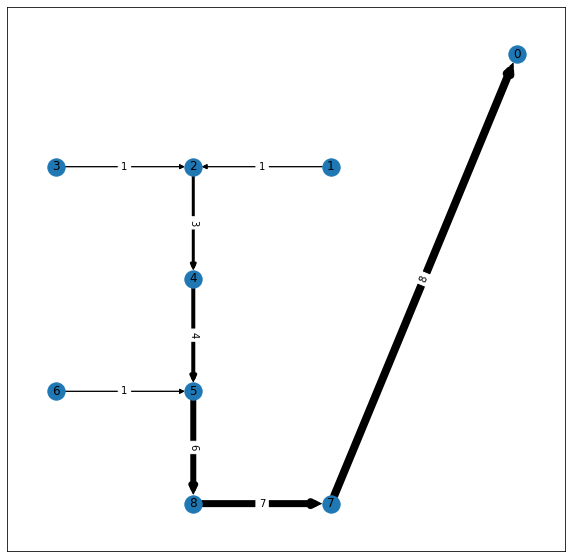

In [41]:
print("Gurobi runtime is", m.Runtime ,"seconds")
final_G = nx.DiGraph()
final_G = nx.from_numpy_array(np.zeros_like(network),create_using=nx.DiGraph(directed=True))

#print(str(final_index // Q))
#print(str(final_index % Q))

for item in x_list:
    #print(item)
    
    index, level = item.split(',')
    
    #print(index, int(level) + 1)
    
    final_G.add_weighted_edges_from([(*edge, int(level)+1)  for edge, label in compelete_label.items() if label == index ])
    


    
matfig = plt.figure(figsize=(10,10)) 
labels = nx.get_edge_attributes(final_G,'weight')
widths = list(nx.get_edge_attributes(final_G,'weight').values())
print("widths",widths)
nx.draw_networkx(final_G, pos)
nx.draw_networkx_edge_labels(final_G,pos,edge_labels = labels)
nx.draw_networkx_edges(final_G,pos,width = widths)